In [2]:
!pip install mysql-connector-python

In [3]:
import mysql.connector
import pandas as pd

cnx = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="Jriya@#2023",
    database="e_commerce")

In [4]:
query = "Select * from ecommerce_customer;"
query


'Select * from ecommerce_customer;'

In [5]:
df = pd.read_sql(query, cnx) 
df.head() 


C:\Users\jriya\AppData\Local\Temp\ipykernel_12372\2085494670.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Returns,Customer Name,Age,Gender,Churn
0,46251,08-09-2020,Electronics,12,3,740,Credit Card,0,Christine Hernandez,37,Male,0
1,46251,06-03-2022,Home,468,4,2739,PayPal,0,Christine Hernandez,37,Male,0
2,46251,24-05-2022,Home,288,2,3196,PayPal,0,Christine Hernandez,37,Male,0
3,46251,13-11-2020,Clothing,196,1,3509,PayPal,0,Christine Hernandez,37,Male,0
4,13593,28-11-2020,Home,449,1,3452,Credit Card,0,James Grant,49,Female,1


In [6]:
df_copy  = df.copy()


In [7]:
cnx.close()

In [8]:
import pandas as pd
import numpy as np          
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df.shape

(405022, 12)

In [10]:
df.describe()


,Customer ID,Product Price,Quantity,Total Purchase Amount,Returns,Age,Churn
count,405022.000000,405022.000000,405022.000000,405022.000000,405022.000000,405022.000000,405022.000000
mean,25017.062725,254.638383,3.003847,2725.474419,0.499343,43.872182,0.200256
std,14412.453435,141.643090,1.414393,1441.902782,0.500000,15.355357,0.400192
min,1.000000,10.000000,1.000000,100.000000,0.000000,18.000000,0.000000
25%,12574.000000,132.000000,2.000000,1478.000000,0.000000,30.000000,0.000000
50%,25018.000000,255.000000,3.000000,2727.000000,0.000000,44.000000,0.000000
75%,37478.000000,377.000000,4.000000,3973.000000,1.000000,57.000000,0.000000
max,50000.000000,500.000000,5.000000,5350.000000,1.000000,70.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405022 entries, 0 to 405021
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Customer ID            405022 non-null  int64 
 1   Purchase Date          405022 non-null  object
 2   Product Category       405022 non-null  object
 3   Product Price          405022 non-null  int64 
 4   Quantity               405022 non-null  int64 
 5   Total Purchase Amount  405022 non-null  int64 
 6   Payment Method         405022 non-null  object
 7   Returns                405022 non-null  int64 
 8   Customer Name          405022 non-null  object
 9   Age                    405022 non-null  int64 
 10  Gender                 405022 non-null  object
 11  Churn                  405022 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 37.1+ MB


In [12]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'],errors='coerce')

In [13]:
# check null values

df.isnull().sum()

Customer ID                   0
Purchase Date            243514
Product Category              0
Product Price                 0
Quantity                      0
Total Purchase Amount         0
Payment Method                0
Returns                       0
Customer Name                 0
Age                           0
Gender                        0
Churn                         0
dtype: int64

In [14]:
# filter date is notnull

df_with_date = df[df['Purchase Date'].notnull()]

In [15]:
# Check duplicates

df.duplicated().sum()   

np.int64(0)

In [17]:
# Clean Categorical Columns

df['Returns'] = df['Returns'].replace({0: 'No', 1: 'Yes'})
df['Churn'] = df['Churn'].replace({0: 'Active', 1: 'Churned'})
df['Gender'] = df['Gender'].str.title().astype('category')
df['Product Category'] = df['Product Category'].astype('category')
df['Payment Method'] = df['Payment Method'].astype('category')



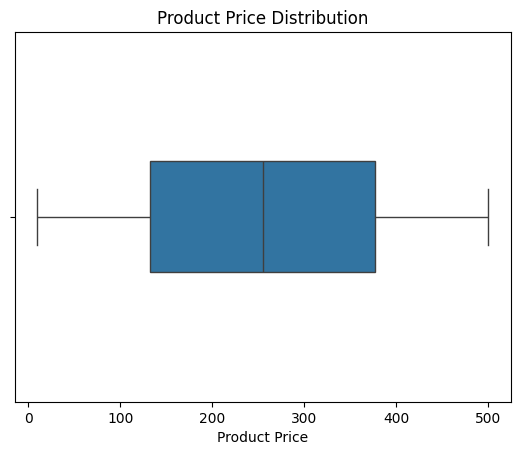

In [107]:
barWidth = 0.3
sns.boxplot(x=df['Product Price'], width = barWidth)
plt.title("Product Price Distribution")
plt.show()

In [ ]:
# there is no outliers in product price

In [18]:
# Hence the "data cleaning" is done successfully. The dataset is now ready for further analysis and visualization.

In [19]:
# EDA

In [ ]:
# Top Customers

top_customers = df.groupby('Customer Name')['Total Purchase Amount'].sum().sort_values(ascending=False).head(10)

# Display the result as a table 
top_customers = top_customers.reset_index()
top_customers.columns = ['Customer Name', 'Total Purchase Amount']
print(top_customers)

      Customer Name  Total Purchase Amount
0     Michael Smith                 480033
1        John Smith                 471458
2   Michael Johnson                 441665
3       James Smith                 434863
4     Michael Brown                 398503
5    Jennifer Smith                 394456
6     Michael Jones                 360484
7  Michael Williams                 357418
8     David Johnson                 351030
9      John Johnson                 324466


In [128]:
# Average order value

average_order_value = df['Total Purchase Amount'].mean()
print(f"Average Order Value: {average_order_value:.2f}")    

Average Order Value: 2725.47


In [1]:
# Sales trends over time

df['year'] = df['Purchase Date'].dt.year

yearly_sales = df.groupby('year')['Total Purchase Amount'].sum()

plt.figure(figsize=(10, 5))
yearly_sales.plot(marker='o', linestyle='-', color='teal')
plt.title("Yearly Total Purchase Amount Trend")
plt.xlabel("Year")
plt.ylabel("Total Purchase Amount")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

In [2]:
# it shows that the stable sales performance over 2020 to 2022 and In 2023, total purchase amount drops significantly

In [3]:
# Top Product Categories
color = [ 'blue', 'red', 'purple', 'yellow']
df.groupby('Product Category')['Total Purchase Amount'].sum().sort_values(ascending=False).plot(kind='bar', color = color)
plt.xticks(rotation=0) 


NameError: name 'df' is not defined

In [4]:
# Books and Clothing are the most purchased product category

In [5]:
# Payment Method Analysis

color = ['maroon' , 'firebrick' ,'indianred' , 'lightcoral']
df.groupby('Payment Method')['Total Purchase Amount'].sum().sort_values(ascending=False).plot(kind='bar' , color = color)

plt.xlabel('Payment Method')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

NameError: name 'df' is not defined

In [6]:
# Credit Card most preferred payment method

In [7]:
# Price vs Quantity Relationship
sns.scatterplot(data=df, x='Product Price', y='Quantity')

NameError: name 'sns' is not defined

In [8]:
# There's no strong price sensitivity in quantity purchased — meaning price doesn’t heavily influence how many units people buy

In [9]:
# Purchase behavior by gender

df.groupby('Gender')['Total Purchase Amount'].sum().sort_values(ascending=False).plot(kind='bar',color = 'y')
plt.xlabel('Gender')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

NameError: name 'df' is not defined

In [10]:
# Male and Female customers have similar total purchase amounts, with a slight

In [11]:
# Purchase behavior by Age

bins = [18, 25, 35, 45, 55, 65, 71]  # Covers ages 18–70
labels = ['18–24', '25–34', '35–44', '45–54', '55–64', '65–70']

# Create Age Group column
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False ,include_lowest=True)

age_group_sales = df.groupby('Age Group')['Total Purchase Amount'].sum().sort_values(ascending=False)

color = ['darkorange', 'orange', 'goldenrod', 'gold', 'olivedrab', 'seagreen']
plt.figure(figsize=(8, 5))
age_group_sales.plot(kind='bar', color=color)
plt.xlabel('Age Group')
plt.ylabel('Total Purchase Amount')
plt.title('Total Purchase Amount by Age Group')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()




NameError: name 'pd' is not defined

In [12]:
# this represents the total purchase amount by age group, showing that the 55-64 age group has the highest total purchase amount, followed by the 35-44, 45-54 and 25-34 age groups. The 18-24 and 65-70 age groups have the lowest total purchase amounts.

In [13]:

df['Returns'] = df['Returns'].replace({'Yes': 1, 'No': 0}).astype(int)

# Count total and returned orders by Product Category

category_returns = df.groupby('Product Category')['Returns'].agg(
    total_orders='count',
    total_returns='sum'
)

# Calculate return rate (%)

category_returns['Return Rate (%)'] = (category_returns['total_returns'] / category_returns['total_orders']) * 100

#Prepare data for pie chart

pie_data = category_returns['Return Rate (%)'].sort_values(ascending=False)

#Plot pie chart

plt.figure(figsize=(8, 6))
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Return Rate Distribution by Product Category')
plt.axis('equal')
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined